In [1]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [52]:
t = np.linspace(0, 1, 1000, False)

#Input signal 'data'
data2 = np.sin(2*np.pi*10*t) + np.sin(2*np.pi*20*t)

data = 0.6 * np.sin(2*np.pi*5*t) + 0.4 * np.sin(2*np.pi*10*t) + 0.1 * np.random.normal(size=t.shape)

C:\Users\grace\AppData\Local\Temp\ipykernel_4284\1138809115.py:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "xr" (-> color='r'). The keyword argument will take precedence.
  plt.plot(t[max], data[max], "xr", label='Max', color="red")
C:\Users\grace\AppData\Local\Temp\ipykernel_4284\1138809115.py:26: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "xr" (-> color='r'). The keyword argument will take precedence.
  plt.plot(t[min], data[min], "xr", label='Min', color="purple")


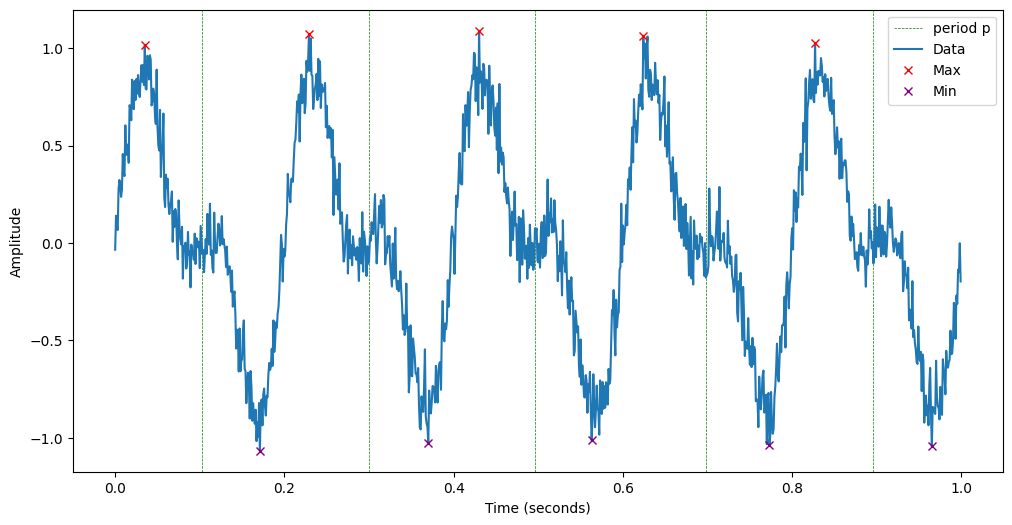

In [75]:
#Finding Peaks, calculating pth segmentation point
L = 5 #User input order L of PMAF

#filter input 8th order butterworth low pass
#b, a = signal.butter(8, [5], 'lowpass', analog = False, output = 'ba', fs = 100)
#filtered = signal.filtfilt(b, a, data)

max_peaks, _ = find_peaks(data, distance=20)
min_peaks, _ = find_peaks(-data, distance=20)

max = max_peaks[data[max_peaks] >= 1]
min = min_peaks[data[min_peaks] <= -1]

plt.figure(figsize=(12, 6)) 

min_times = t[min]
max_times = t[max]
avg_period = (min_times + max_times) / 2

for mean_time in avg_period:
    plt.axvline(x=mean_time, color='green', linestyle='--', linewidth=0.5, label='period p' if mean_time == avg_period[0] else "")

# Plot data and peaks
plt.plot(t, data, label='Data')
plt.plot(t[max], data[max], "xr", label='Max', color="red")
plt.plot(t[min], data[min], "xr", label='Min', color="purple")
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

C:\Users\grace\AppData\Local\Temp\ipykernel_4284\773165138.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "xr" (-> color='r'). The keyword argument will take precedence.
  ax1.plot(t[max], data[max], "xr", label='Max', color="red")
C:\Users\grace\AppData\Local\Temp\ipykernel_4284\773165138.py:39: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "xr" (-> color='r'). The keyword argument will take precedence.
  ax1.plot(t[min], data[min], "xr", label='Min', color="purple")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.49870000000000003


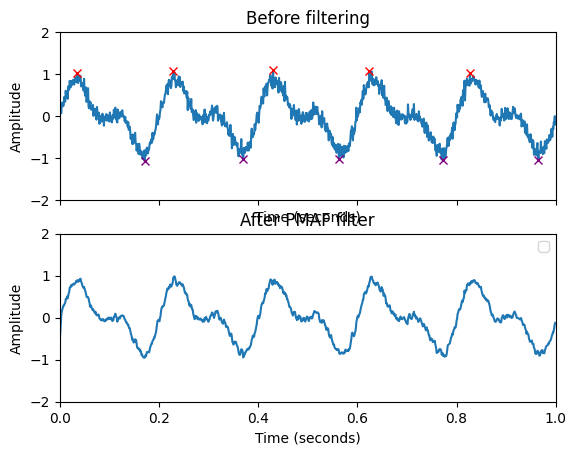

In [89]:
#PMAF Implementation
mean_period = np.mean(avg_period)
print(mean_period)

def pmaf_filter(data, N, avg_period, pad):
    #N number of periods
    total_window = int(N * avg_period)

    if(pad == 'min'):
        data_arr = np.concatenate(([np.min(data)] * (total_window), data))
    elif(pad == 'percentile'):
        data_arr = np.concatenate(([np.percentile(data, 10)] * (total_window), data))
    else:
        raise ValueError("Specify 'min' or 'percentile' to pad array with")
    
    cumsum = np.cumsum(data_arr)
    filtered = (cumsum[total_window:] - cumsum[:-total_window]) / total_window
    return filtered

filtered_data = moving_avg_filter(data, 10, mean_period, 'percentile')


# Plot data and peaks
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True) #Sampled at 1 kHz
ax1.plot(t, data)
ax1.set_title('Before filtering')
ax1.set_xlabel('Time (seconds)')
ax1.set_ylabel('Amplitude')
ax1.axis([0, 1, -2, 2])

ax2.plot(t, filtered_data)
ax2.set_title('After PMAF filter')
ax2.axis([0, 1, -2, 2])
ax2.set_xlabel('Time (seconds)')
ax2.set_ylabel('Amplitude')

ax1.plot(t[max], data[max], "xr", label='Max', color="red")
ax1.plot(t[min], data[min], "xr", label='Min', color="purple")

plt.legend()
plt.show()

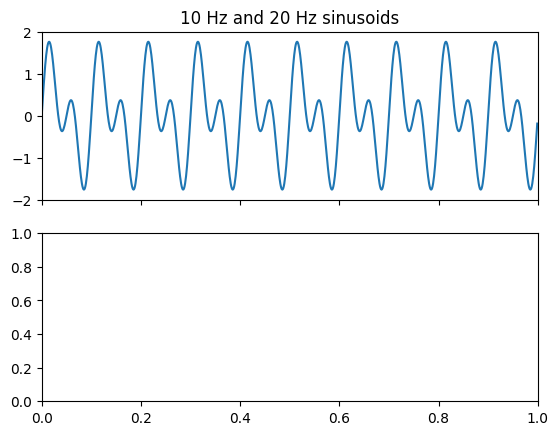

In [10]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True) #Sampled at 1 kHz
ax1.plot(t, signalA)
ax1.set_title('10 Hz and 20 Hz sinusoids')
ax1.axis([0, 1, -2, 2])

ax2.plot(t, signalA_output)
ax2.set_title('After PMAF filter')

plt.show()
